In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [313]:
train_df=pd.read_csv('train_data.csv')

In [314]:
test_df=pd.read_csv('test_data.csv')

In [315]:
train_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,9255,15601116,P'an,686,France,Male,32,6,0.00,2,1,1,179093.26,0,0,2,DIAMOND,510
1,1562,15766374,Leak,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0,0,4,PLATINUM,959
2,1671,15716994,Green,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1,1,4,SILVER,327
3,6088,15730759,Chukwudi,561,France,Female,27,9,135637.00,1,1,0,153080.40,1,1,2,SILVER,567
4,6670,15797900,Chinomso,517,France,Male,56,9,142147.32,1,0,0,39488.04,1,1,3,PLATINUM,727


In [316]:
train_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [317]:
train_df.drop('RowNumber',axis=1,inplace=True)

In [318]:
train_df.drop('Surname',axis=1,inplace=True)

In [319]:
from sklearn.preprocessing import LabelEncoder

In [320]:
labelEncoder=LabelEncoder()

In [321]:
train_df['Gender_encoded']=labelEncoder.fit_transform(train_df['Gender'])

In [322]:
num_corr=train_df.corr(numeric_only=True)

<Axes: >

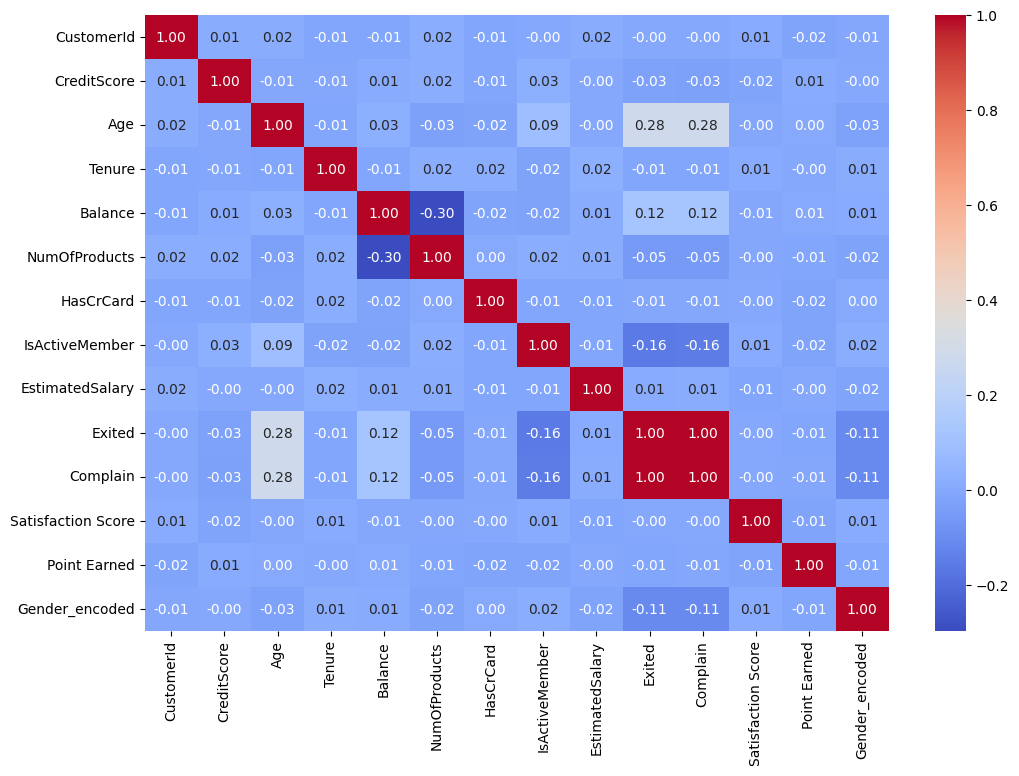

In [323]:
plt.figure(figsize=(12,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt=".2f")

In [324]:
train_df.drop('Complain',axis=1,inplace=True)

In [325]:
train_df.drop('Gender',axis=1,inplace=True)

<Axes: xlabel='Gender_encoded', ylabel='count'>

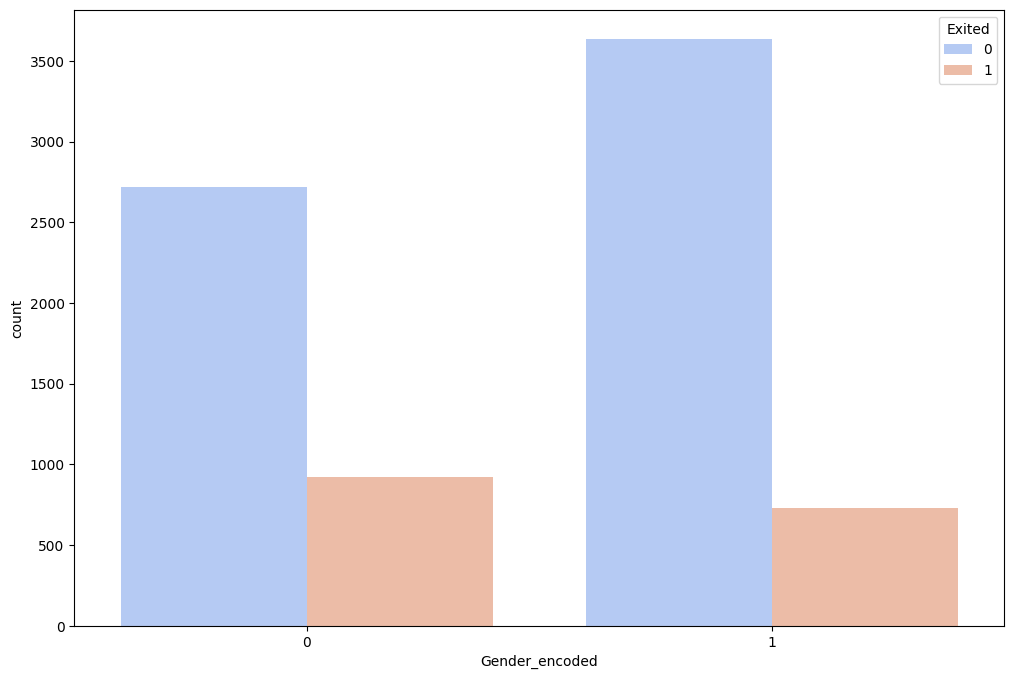

In [326]:
plt.figure(figsize=(12,8))
sns.countplot(x=train_df['Gender_encoded'], hue=train_df['Exited'], palette='coolwarm')

In [327]:
train_df['Gender_encoded'].value_counts()

Gender_encoded
1    4362
0    3638
Name: count, dtype: int64

In [328]:
train_df.groupby('Gender_encoded')['Exited'].value_counts(normalize=True) * 100


Gender_encoded  Exited
0               0         74.738868
                1         25.261132
1               0         83.356259
                1         16.643741
Name: proportion, dtype: float64

In [329]:
4362*16/100

697.92

In [330]:
3638*25/100

909.5

<Axes: xlabel='Age', ylabel='count'>

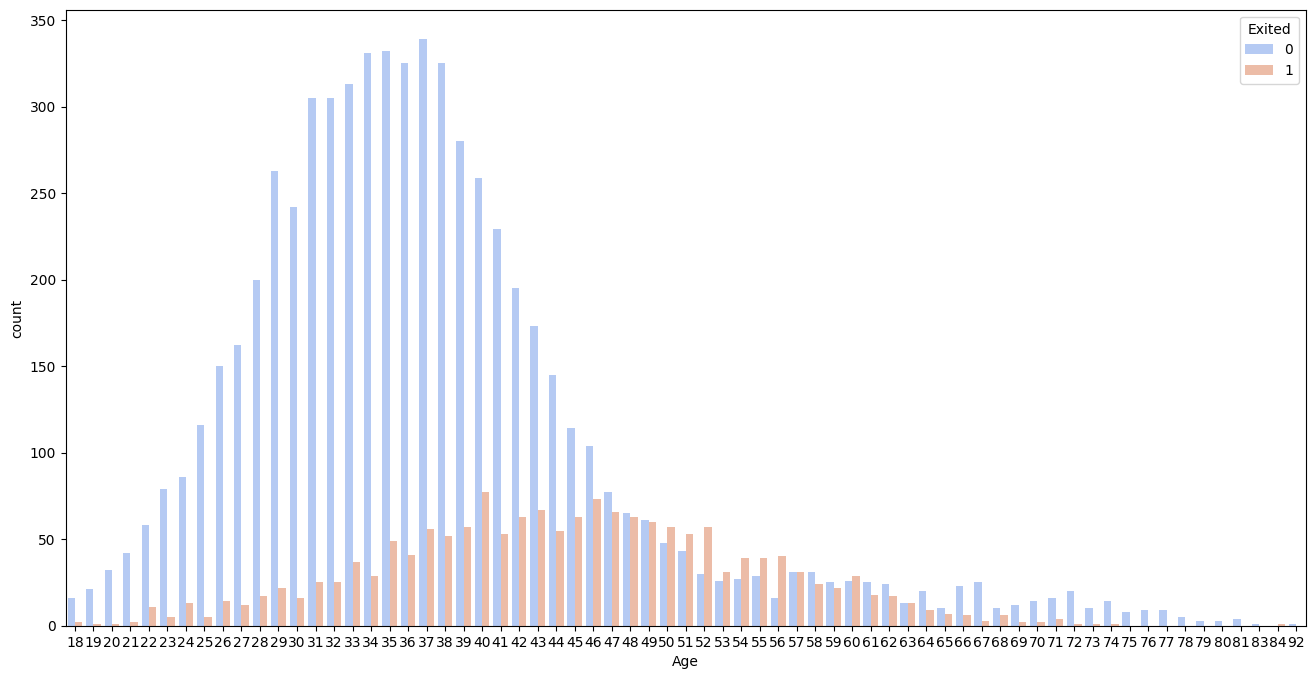

In [331]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df['Age'], hue=train_df['Exited'], palette='coolwarm')

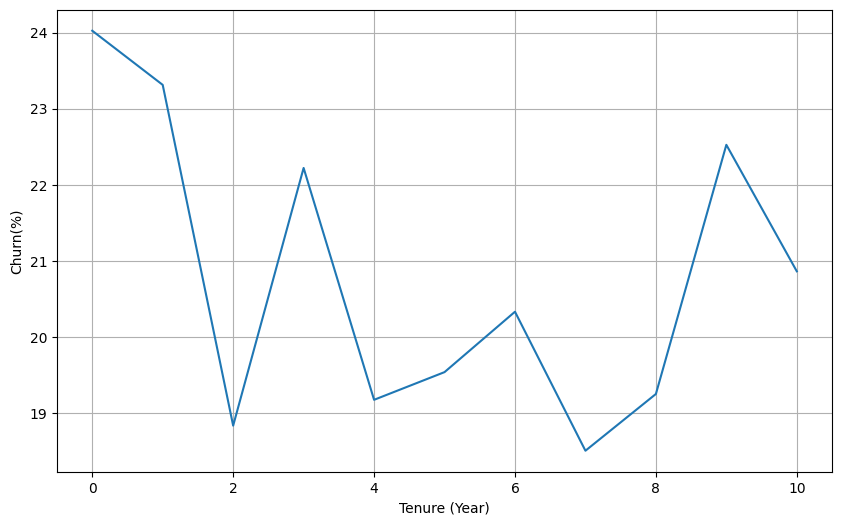

In [332]:
tenure_churn = train_df.groupby('Tenure')['Exited'].mean() * 100
plt.figure(figsize=(10,6))
sns.lineplot(x=tenure_churn.index, y=tenure_churn.values)
plt.xlabel("Tenure (Year)")
plt.ylabel("Churn(%)")
plt.grid()
plt.show()


In [333]:
bins = [0, 2, 5, 10]  
labels = ["Yeni", "Orta", "Uzun Süreli"]  
train_df["Tenure_Group"] = pd.cut(train_df["Tenure"], bins=bins, labels=labels)


In [334]:
train_df['Tenure_Group']=labelEncoder.fit_transform(train_df['Tenure_Group'])

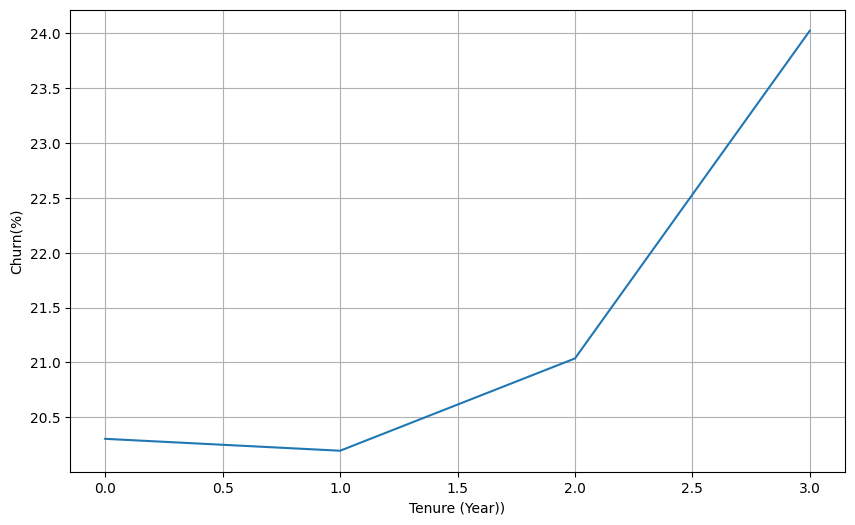

In [335]:
tenure_churn = train_df.groupby('Tenure_Group')['Exited'].mean() * 100
plt.figure(figsize=(10,6))
sns.lineplot(x=tenure_churn.index, y=tenure_churn.values)
plt.xlabel("Tenure (Year))")
plt.ylabel("Churn(%)")
plt.grid()
plt.show()


In [336]:
train_df['Balance'].mean()

np.float64(76102.13964500002)

<Axes: xlabel='NumOfProducts', ylabel='count'>

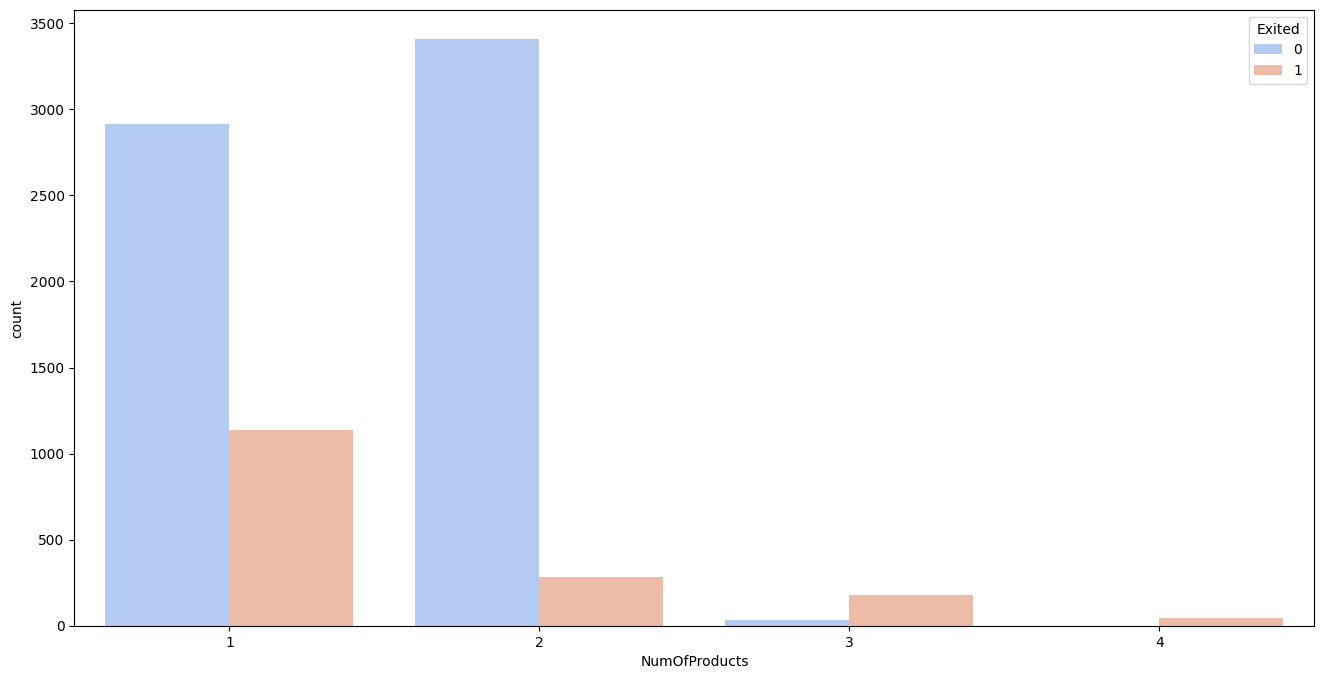

In [337]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df['NumOfProducts'], hue=train_df['Exited'], palette='coolwarm')

<Axes: xlabel='Geography', ylabel='count'>

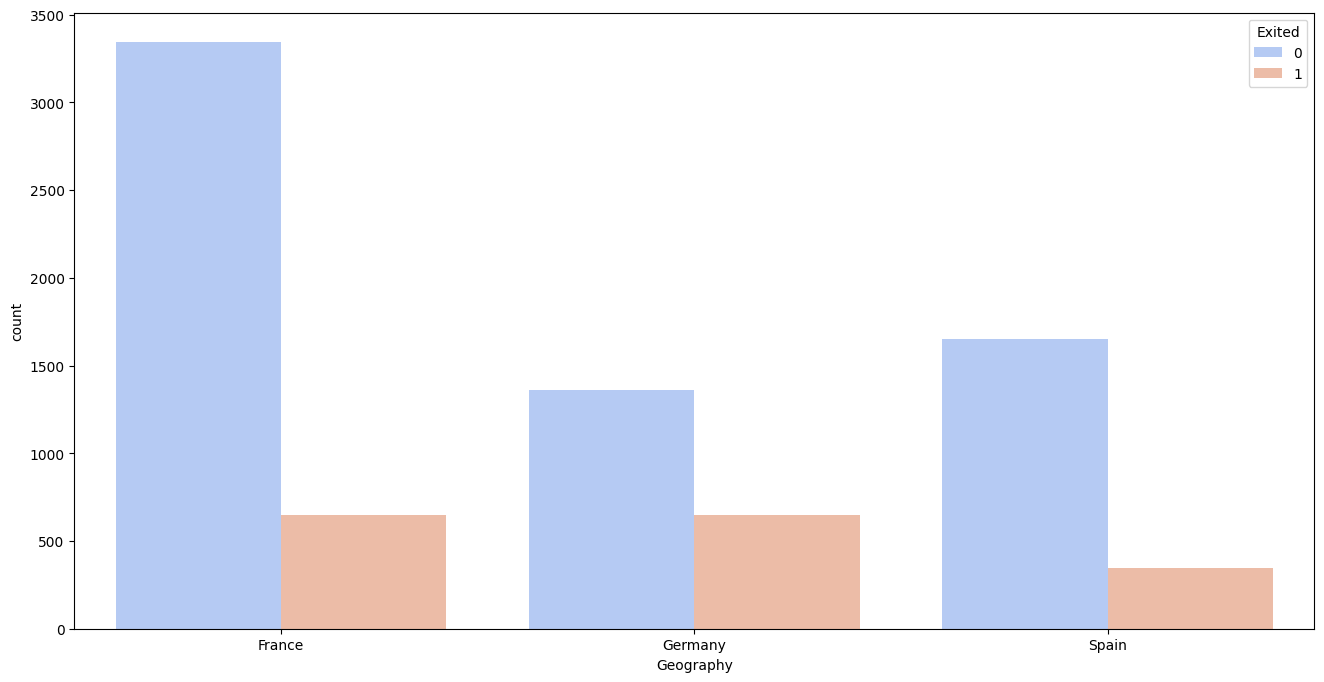

In [338]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df['Geography'], hue=train_df['Exited'], palette='coolwarm')

In [339]:
train_df = pd.get_dummies(train_df, columns=['Geography'], drop_first=True, dtype=int)


In [340]:
train_df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,Gender_encoded,Tenure_Group,Geography_Germany,Geography_Spain
0,15601116,686,32,6,0.00,2,1,1,179093.26,0,2,DIAMOND,510,1,1,0,0
1,15766374,632,42,4,119624.60,2,1,1,195978.86,0,4,PLATINUM,959,1,0,1,0
2,15716994,559,24,3,114739.92,1,1,0,85891.02,1,4,SILVER,327,1,0,0,1
3,15730759,561,27,9,135637.00,1,1,0,153080.40,1,2,SILVER,567,0,1,0,0
4,15797900,517,56,9,142147.32,1,0,0,39488.04,1,3,PLATINUM,727,1,1,0,0


In [341]:
train_df.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'Gender_encoded', 'Tenure_Group', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [342]:
train_df['Satisfaction Score'].head(10)

0    2
1    4
2    4
3    2
4    3
5    5
6    3
7    1
8    4
9    5
Name: Satisfaction Score, dtype: int64

In [343]:
train_df['Satisfaction Score'].value_counts()

Satisfaction Score
3    1640
4    1627
2    1595
5    1583
1    1555
Name: count, dtype: int64

In [344]:
train_df['CreditBalance_Ratio'] = train_df['CreditScore'] / (train_df['Balance'] + 1)


<Axes: >

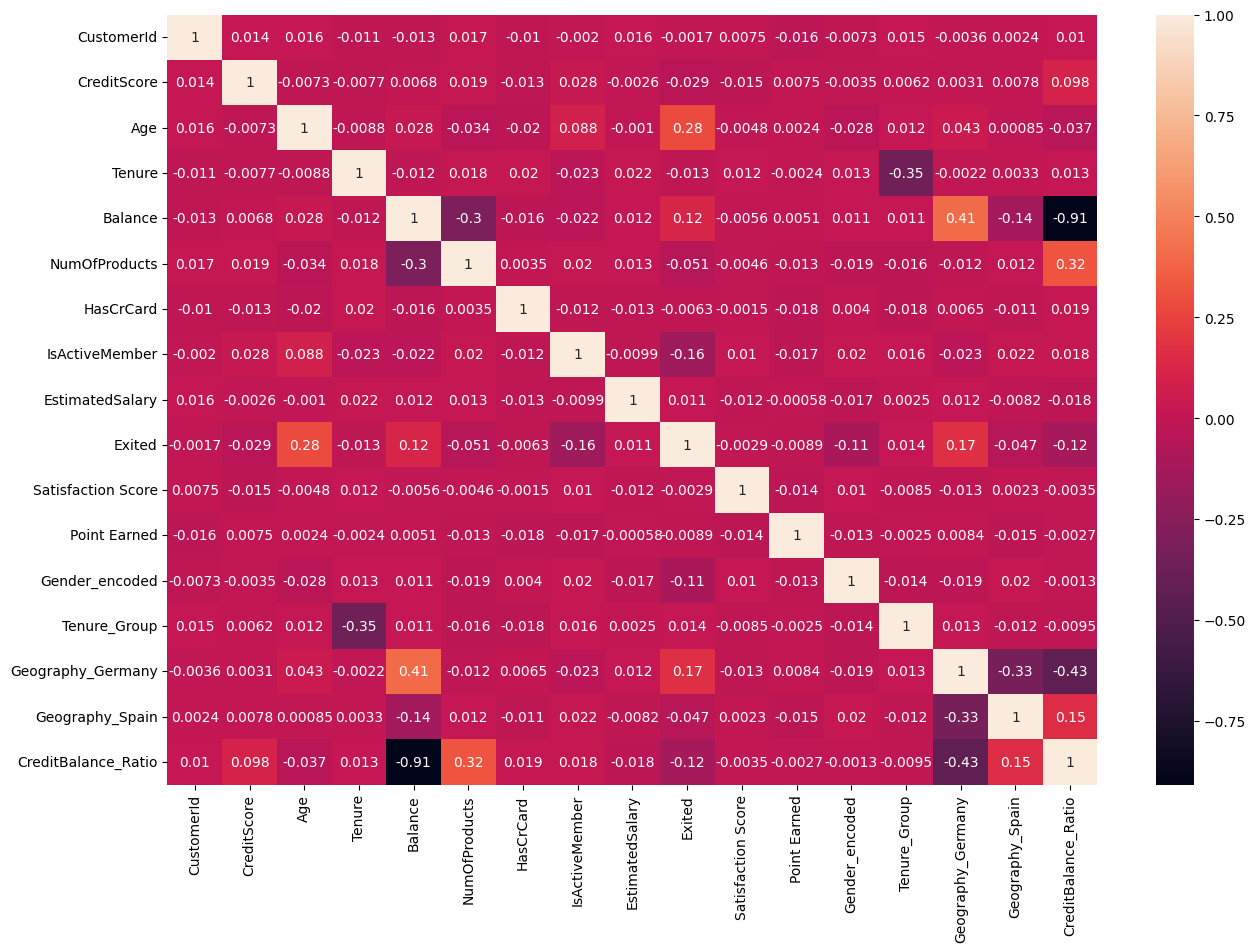

In [345]:
plt.figure(figsize=(15,10))
num_corr2=train_df.corr(numeric_only=True)
sns.heatmap(num_corr2,annot=True)

In [346]:
train_df.drop(columns=['CreditScore','Balance'],axis=1,inplace=True)

In [347]:
train_df.columns

Index(['CustomerId', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'Gender_encoded', 'Tenure_Group',
       'Geography_Germany', 'Geography_Spain', 'CreditBalance_Ratio'],
      dtype='object')

In [348]:
train_df['Exited'].value_counts()

Exited
0    6355
1    1645
Name: count, dtype: int64

<Axes: >

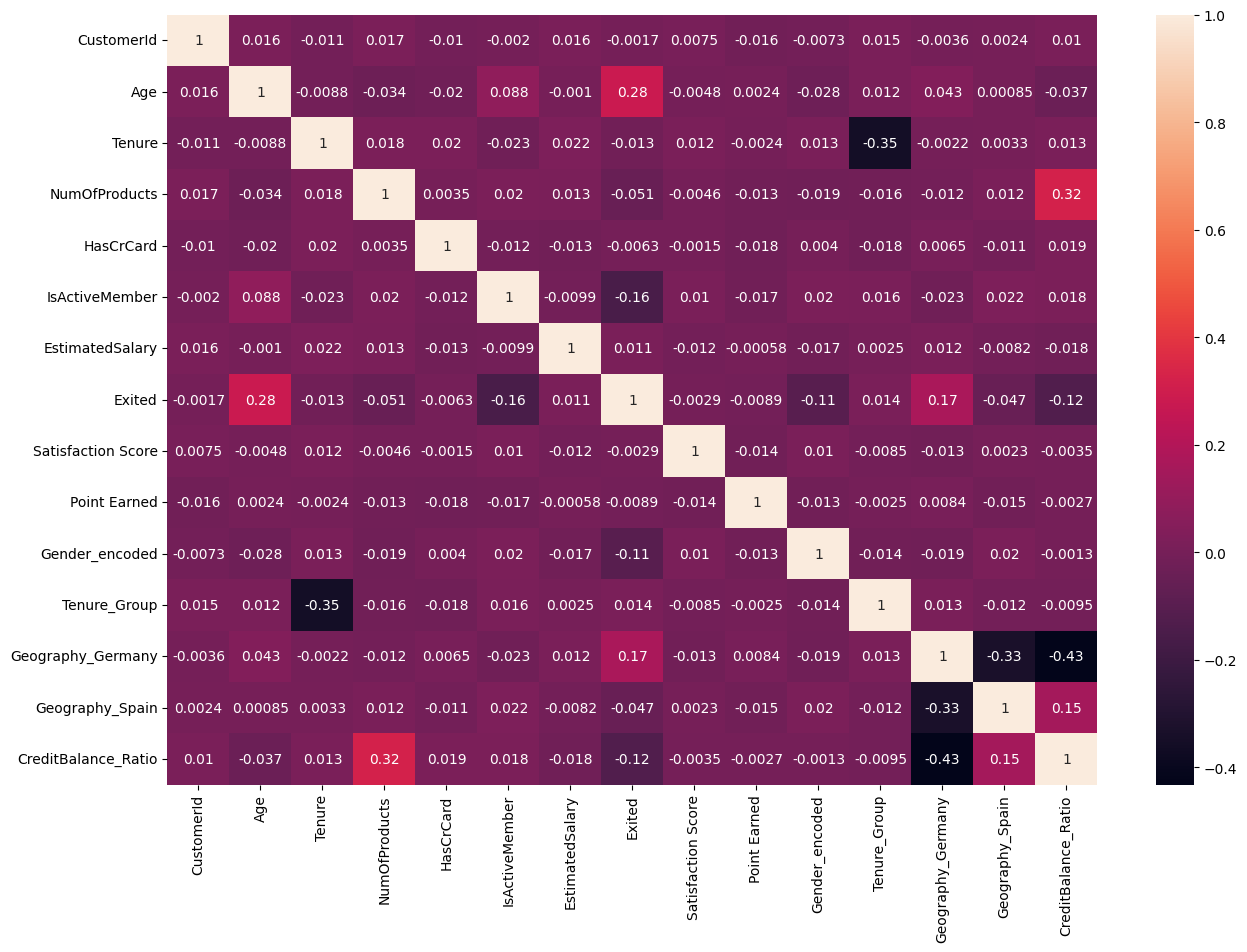

In [349]:
plt.figure(figsize=(15,10))
num_corr2=train_df.corr(numeric_only=True)
sns.heatmap(num_corr2,annot=True)

In [350]:
train_df['Card Type'].value_counts()

Card Type
PLATINUM    2015
DIAMOND     2004
GOLD        1999
SILVER      1982
Name: count, dtype: int64

In [351]:
from sklearn.preprocessing import OrdinalEncoder

In [352]:
ordinalEncoder=OrdinalEncoder()

In [353]:
train_df['Card Type']=ordinalEncoder.fit_transform(train_df[['Card Type']])

In [354]:
train_df.head()

,CustomerId,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,Gender_encoded,Tenure_Group,Geography_Germany,Geography_Spain,CreditBalance_Ratio
0,15601116,32,6,2,1,1,179093.26,0,2,0.0,510,1,1,0,0,686.000000
1,15766374,42,4,2,1,1,195978.86,0,4,2.0,959,1,0,1,0,0.005283
2,15716994,24,3,1,1,0,85891.02,1,4,3.0,327,1,0,0,1,0.004872
3,15730759,27,9,1,1,0,153080.40,1,2,3.0,567,0,1,0,0,0.004136
4,15797900,56,9,1,0,0,39488.04,1,3,2.0,727,1,1,0,0,0.003637


In [355]:
from sklearn.ensemble import RandomForestClassifier

In [356]:
from sklearn.model_selection import GridSearchCV

In [357]:
X=train_df.drop('Exited',axis=1)

In [358]:
y=train_df['Exited']

SMOTE

In [359]:
from imblearn.over_sampling import SMOTE

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  


In [361]:
import collections

In [362]:
RFC=RandomForestClassifier(random_state=101)

In [363]:
#RFC_param_grid = {
#    'n_estimators': [100, 200, 300, 500],  # Ağaç sayısı
#    'max_depth': [10, 20, 30, None],  # Maksimum derinlik (None: sınırsız)
#    'min_samples_split': [2, 5, 10, 20],  # Bölünme için min örnek sayısı
#    'min_samples_leaf': [1, 2, 4, 10],  # Yaprak düğümlerinde min örnek sayısı
#    'max_features': ['sqrt', None],  # Feature seçim stratejisi
#}


In [364]:
#RFC_grid_search=GridSearchCV(RFC, param_grid=RFC_param_grid, cv=5, n_jobs=-1, verbose=2)

In [365]:
#RFC_grid_search.fit(X_train,y_train)

In [366]:
#RFC_grid_search.best_params_

In [367]:
#RFC_grid_search.best_score_

In [368]:
RFC=RandomForestClassifier(min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100,n_jobs=-1, verbose=2,random_state=102)

In [369]:
RFC.fit(X_train_resampled,y_train_resampled)

building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(n_jobs=-1, random_state=102, verbose=2)

In [370]:
RFC_y_pred=RFC.predict(X_test)

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


In [371]:
from sklearn.metrics import confusion_matrix,classification_report

In [372]:
print(classification_report(RFC_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1955
           1       0.51      0.57      0.54       445

    accuracy                           0.82      2400
   macro avg       0.71      0.72      0.71      2400
weighted avg       0.83      0.82      0.82      2400



In [373]:
train_score = RFC.score(X_train_resampled, y_train_resampled)
test_score = RFC.score(X_test, y_test)

print(f"Eğitim Skoru: {train_score:.4f}")
print(f"Test Skoru: {test_score:.4f}")


Eğitim Skoru: 1.0000
Test Skoru: 0.8200


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


In [374]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = RFC.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1715  192]
 [ 240  253]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1907
           1       0.57      0.51      0.54       493

    accuracy                           0.82      2400
   macro avg       0.72      0.71      0.71      2400
weighted avg       0.81      0.82      0.82      2400



[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


In [375]:
#cv_score = RFC_grid_search.best_score_
#print(f"Cross-validation Skoru: {cv_score:.4f}")


In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(class_weight="balanced", random_state=42)
logreg.fit(X_train_scaled, y_train_resampled)

y_pred_logreg = logreg.predict(X_test_scaled)

print("LogisticRegression")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

LogisticRegression
Confusion Matrix:
 [[1467  440]
 [ 217  276]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      1907
           1       0.39      0.56      0.46       493

    accuracy                           0.73      2400
   macro avg       0.63      0.66      0.64      2400
weighted avg       0.77      0.73      0.74      2400

Accuracy: 0.72625


In [383]:
svm = SVC(class_weight="balanced", random_state=42, probability=True)
svm.fit(X_train_scaled, y_train_resampled)

y_pred_svm = svm.predict(X_test_scaled)

print("SVC")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVC
Confusion Matrix:
 [[1662  245]
 [ 219  274]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1907
           1       0.53      0.56      0.54       493

    accuracy                           0.81      2400
   macro avg       0.71      0.71      0.71      2400
weighted avg       0.81      0.81      0.81      2400

Accuracy: 0.8066666666666666


In [386]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
XGB = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

In [391]:
XGB_param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5,6,8],
    'min_child_weight': [1, 3,4],
    'subsample': [0.5, 0.7, 0.8],
    'colsample_bytree': [0.5, 0.7,0.8],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 2,3,4]
}

In [ ]:
XGB_random_search = RandomizedSearchCV(
    estimator=XGB,
    param_distributions=XGB_param_dist,
    n_iter=20,  
    scoring='f1',  
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1  
)

In [393]:
XGB_random_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.8],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 6, 8],
                                        'min_child_weight': [1, 3, 4],
                                        'n_estimators': [100, 200, 300, 400],
                                        'scale_pos_weight': [1, 2, 3, 4],
                                        'subsample': [0.5, 0.7, 0.8]},
                   random_state=42, scoring='f1', verbose=2)

In [395]:
XGB = XGB_random_search.best_estimator_

In [396]:
XGB_y_pred=XGB.predict(X_test)

In [398]:
print("Confusion Matrix:\n", confusion_matrix(y_test, XGB_y_pred))
print("Classification Report:\n", classification_report(y_test, XGB_y_pred))
print("Accuracy:", accuracy_score(y_test, XGB_y_pred))

Confusion Matrix:
 [[1763  144]
 [ 254  239]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      1907
           1       0.62      0.48      0.55       493

    accuracy                           0.83      2400
   macro avg       0.75      0.70      0.72      2400
weighted avg       0.82      0.83      0.83      2400

Accuracy: 0.8341666666666666
